In [1]:
import pandas as pd
import numpy as np

# Data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

# Text Cleaning packages
!pip install neattext
import neattext.functions as nfx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 3.2 MB/s eta 0:00:00


In [2]:
df= pd.read_csv('/content/emotion_dataset_2.csv')

In [3]:
df.head()


,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [4]:
df.drop(columns=['Unnamed: 0', 'Clean_Text'], inplace=True)

In [5]:
df.shape


(34792, 2)

In [6]:
df.dtypes

,0
Emotion,object
Text,object


In [7]:
df.isnull().sum()

,0
Emotion,0
Text,0


In [8]:
# value counts of Emotions
df['Emotion'].value_counts()

,count
Emotion,
joy,11045
sadness,6722
fear,5410
anger,4297
surprise,4062
neutral,2254
disgust,856
shame,146


<Axes: xlabel='Emotion'>

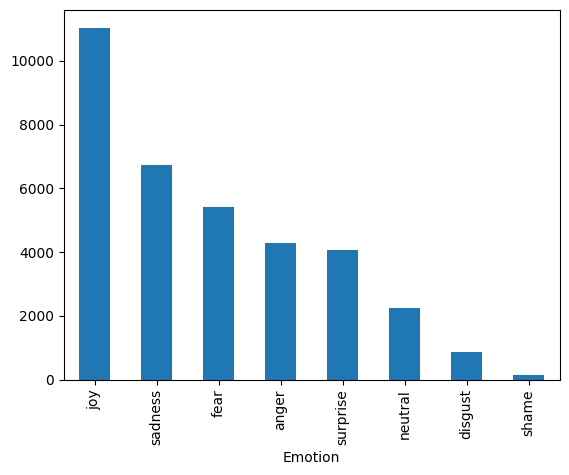

In [9]:
# Value counts of Emotions
df['Emotion'].value_counts().plot(kind='bar')

In [10]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [11]:
df['Clean_Text']= df['Text'].apply(nfx.remove_stopwords)

In [12]:
df['Clean_Text']= df['Clean_Text'].apply(nfx.remove_userhandles)

In [13]:
df['Clean_Text']= df['Clean_Text'].apply(nfx.remove_punctuations)

In [14]:
df[['Text','Clean_Text']]

,Text,Clean_Text
0,Why ?,
1,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...
34787,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,A man robbed me today .,man robbed today
34790,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU


In [15]:
label_map={
    'joy':0,
    'fear':1,
    'anger':2,
    'sadness':3,
    'disgust':4,
    'shame':5,
    'surprise':6,
    'neutral':7

}
df['Emotion']= df['Emotion'].map(label_map)

In [17]:
x= df['Clean_Text']
y= df['Emotion']

In [18]:
x

,Clean_Text
0,
1,Sage Act upgrade list tommorow
2,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,eye true hazel eyeand brilliant Regular feat...
4,ugh babe hugggzzz u babe naamazed nga ako e...
...,...
34787,gift Hope like it hand wear Itll warm Lol
34788,world didnt meso world DEFINITELY cnt away
34789,man robbed today
34790,Youu JEALOUSY #Losing YOU


In [19]:
y

,Emotion
0,7
1,0
2,3
3,0
4,0
...,...
34787,6
34788,0
34789,2
34790,1


In [20]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)

In [21]:
# Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()
x_train= cv.fit_transform(x_train) # Fit and transform using the training data only
x_test= cv.transform(x_test.astype(str)) # Convert x_test to string before applying transform
# Get Features By name
cv.get_feature_names_out()

array(['00', '000', '000ème', ..., 'หญ', 'เขาจะเผาม', 'ღƪ'], dtype=object)

In [22]:
from sklearn.naive_bayes import MultinomialNB
nv_model= MultinomialNB().fit(x_train,y_train)

In [23]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
nv_model.score(x_test,y_test)

0.5707990036405441

In [24]:
y_pred= nv_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.51      0.87      0.64      3311
           1       0.76      0.60      0.67      1645
           2       0.66      0.50      0.57      1283
           3       0.56      0.53      0.55      2015
           4       0.78      0.02      0.05       292
           5       0.00      0.00      0.00        36
           6       0.64      0.27      0.38      1181
           7       0.78      0.08      0.15       675

    accuracy                           0.57     10438
   macro avg       0.58      0.36      0.37     10438
weighted avg       0.61      0.57      0.54     10438



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [25]:
import joblib
joblib.dump(nv_model,'detection.pkl')
joblib.dump(cv,'vectorization.pkl')

['vectorization.pkl']